# Project Description
  We want to build a process for selling cars, that removes the guessing of the car prices and allows the price of the car to be a directly influenced by certain features of the car. This believe will help both car owners and buyers to sell and buy their cars at better value.
  
        Predictive Analysis
        Descriptive Analysis

## Data Acquisition

1. Identify and import data
  - Identify columns
  - Add column names to dataset
  - Store data for future use
  - Data understanding

In [176]:
#Importing libraries 
import pandas as pd
import numpy as np

In [177]:
#data path
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [178]:
#read the data 
#data = pd.read_csv(path) as it pullls the data with header as first line of data 
data = pd.read_csv(path, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [179]:
#to see the rows and columns info
data.shape

(205, 26)

In [180]:
data.info()   # it gives more comprehensive information about data attributes
#data.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       205 non-null    object 
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       205 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      205 non-null    object 
 19  19      205 non-null    object 
 20  20      205 non-null    float64
 21  21      205 non-null    object 
 22  22

### Dont make assumption on data that is not your own always ask about the features and their ranges
#### Arrange requirement gathering session for asking questions on that data

In [181]:
#column names from the data dictionary ask for data dictionary to the data owner
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

In [182]:
len(headers)

26

In [183]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64')

In [184]:
#Assigning header to data columns# updating data headers
data.columns = headers

In [185]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [186]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Problems in the data 

1. Data types
2. Missing data and ? marks

In [187]:
#Saving the stage 1 clean data into a csv file for further cleaning and analysis so you dont
#have to go through all of the steps again
data.to_csv('cars_stage1.csv')

# I created a function in the other file using the above script that fetch the data from a given path and then after some changes will store it to the new given path.

#Importing libraries 
import pandas as pd
import numpy as np

def data_fetch(path_fetch, path_store):
    
   #doc string  

    """
    param:
        path_fetch: A path to fetch data from
        path_store:  A path to store the data to
       
    return:
        data: A pandas dataframe
    """
    
    
    #data path
    #path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
    #read the data 
    #data = pd.read_csv(path) as it pullls the data with header as first line of data 
    data = pd.read_csv(path_fetch, header = None)
    #data.head()
    #to see the rows and columns info
    print(data.shape)
    if data.shape == (205,26):
        print("Data fetch successful")
    else:
        print("confirm data. Shape is {data.shape}")
    #data.info()   # it gives more comprehensive information about data attributes
    #data.dtypes

    #column names from the data dictionary ask for data dictionary to the data owner
    headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
    "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
    "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
    "peak-rpm","city-mpg","highway-mpg","price"]

    len(headers)
    data.columns

    #Assigning header to data columns# updating data headers
    data.columns = headers

    data.columns

    print(data.info())

    #Saving the stage 1 clean data into a csv file for further cleaning and analysis so you dont
    #have to go through all of the steps again
    #data.to_csv('cars_stage1.csv')  # it will store the data in memory
    data.to_csv(path_store)       # It will store a csv to a path that is given
    
    return data



In [ ]:
#Calling the function and storing the file to new location

# Importing that function

In [336]:
from car_sales.car_sales_de import data_fetch

In [337]:
pwd  #checking present working directory

'C:\\Users\\Hewlett - Packard\\Documents\\VSCode_learning\\Cryptocurrency_proj'

In [338]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [339]:
store = '\\Users\\Hewlett - Packard\\Documents\\VSCode_learning\\Cryptocurrency_proj'+'\\cleaned_file.csv'

In [340]:
cleaned_data = data_fetch(path_fetch =path, path_store=store)

(205, 26)
Data fetch successful
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 

#     Don't Repeat Yourself in Programming (DRY)

# Data Wrangling

 1. Identify and handle missing values
    - Identify missing values
    - Deal with missing values
    - Correct data format
 2. Data Standardisation
 3. Data Normalisation (Centering/Scaling)
 4. Binning
 5. Indicator variable

###  Identify and handle missing values

In [188]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [189]:
#To look for missing data use
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

###  Looking for missing data pyradiam

  1. MCAR - Missing completely at random
  2. MAR  - Missing at random
  3. MNAR - Missing not at random

In [190]:
#replaceing ? in the data with NaN (not a number) everywhere
# NaN mean empty spaces in python, " "it is not an empyty space in pandasdataframe it is countied as a character in python

data.replace('?', np.nan, inplace = True)


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [192]:
#To check in boolean how many spaces are null and not null
missing_data = data.isnull()
missing_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Count the missing data in each column


In [193]:
# printing all the column names in the missing data and then counting and printing missing data count
for column in list(missing_data.columns):
    print(column)  # It will print all the column names
    print(missing_data[column].value_counts()) #It will count the data values 


symboling
False    205
Name: symboling, dtype: int64
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
make
False    205
Name: make, dtype: int64
fuel-type
False    205
Name: fuel-type, dtype: int64
aspiration
False    205
Name: aspiration, dtype: int64
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
body-style
False    205
Name: body-style, dtype: int64
drive-wheels
False    205
Name: drive-wheels, dtype: int64
engine-location
False    205
Name: engine-location, dtype: int64
wheel-base
False    205
Name: wheel-base, dtype: int64
length
False    205
Name: length, dtype: int64
width
False    205
Name: width, dtype: int64
height
False    205
Name: height, dtype: int64
curb-weight
False    205
Name: curb-weight, dtype: int64
engine-type
False    205
Name: engine-type, dtype: int64
num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64
engine-size
False    205
Name: engine-size, dtype: int64
fuel-system
False    205
Name: 

#### Write down all the column names and number of values that need to be handaled and are blank
1. horsepower         2
2. peak-rpm           2
3. price              4
4. bore               4
5. stroke             4
6. num-of-doors       2
7. normalized-losses  41

seven features need to be fixed


### Two ways of dealing with missing data 
  1. Drop the data that is missing
    - Drop the row
    - Drop the whole column
  2. Replacing the missing data 
    - Replace with mean/average/median
    - Replace with frequency
    - Replace with other functions or methods

It all depends on the data which method should be used 
 

(4*3+2*3+41)/205   = 28.756%
#### About 29% of the data is missing values if we drop this all then 29% of the data os gone which is not good - If 30% of the data is missing from one column them drop that column is worth it, like in nrmalise losses we have  41/205 = 0.2 data missing so dropping that column is not a good option

#### In our data case we will only use the second method to deal with missing data. As we dont cant drop the rows. As they are so many almost 28% of the data. and cant drop a column as it is not more then 305 data is missing

## Replacing missing data


1. ### Replacing with mean the contineous varibles
   - horsepower         2
   - peak-rpm           2
   - bore               4
   - stroke             4
   - normalized-losses  41

2. ### Replacing with frequency/mode the catagorical variable
   - num-of-doors       2

3. ### Drop the row where price is missing as we have in our problem statement to detect the price if price is missing in therow then it does not make sense

   - price              4


### Replacing contineous variables coulmn values with mean

In [194]:
# first check the data type of normalized column that need to be replaced with mean
data['normalized-losses'].dtypes   # the data type is still object so we need to convert it to float first

dtype('O')

In [195]:
data['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [196]:
#method used to convert it into float and calculating the mean
avg_norm = data['normalized-losses'].astype(float).mean() 
#replaces the nan with avg_norm in the normalized_losses column
data['normalized-losses'].replace(np.nan, avg_norm, inplace = True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## DRY(dont repeat yourself), creating a function that will insert mean values to other columns

In [197]:
  
def func_(data,columns):  #function that replace with mean
    for i in columns:
        avg_value = data[i].astype(float).mean()  #converting dtype to float
    #replaces the nan spcaes  with avg_norm in the the column
        data[i] = data[i].replace(np.nan, avg_value)
        print(f"column nmae {i} has been replaced with {avg_value}")
    return data  

    

In [198]:
cols = ['horsepower','peak-rpm', 'bore', 'stroke']

In [199]:
new_data = func_(data=data, columns=cols)


column nmae horsepower has been replaced with 104.25615763546799
column nmae peak-rpm has been replaced with 5125.369458128079
column nmae bore has been replaced with 3.3297512437810957
column nmae stroke has been replaced with 3.2554228855721337


In [200]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Replacing with frequency/mode the catagorical variable

In [201]:
# To find the frequency of values in the column
data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Frequent value in this column is four, replce the missing two values in this column with 'four' by using this

In [202]:
#check the frequent value in the column
max_val = data['num-of-doors'].value_counts().idxmax()
max_val

'four'

In [203]:
#replacing nan with max_val which is 'four'
data['num-of-doors'].replace(np.nan, max_val, inplace = True)


In [204]:
#Checking the count again
data['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

It is not changes to 116 as two more are added to four catagory

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [206]:
#As here the colums that are replaced with mean their data types are object now we need to replace them with float

data[['horsepower','peak-rpm', 'bore', 'stroke']] = data[['horsepower','peak-rpm', 'bore', 'stroke']].astype(float)

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Drop the row where price is missing 

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [259]:
data.loc[data['price'] == np.nan]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [264]:
prc = data['price'].isnull()

In [296]:
prc.value_counts()

False    201
True       4
Name: price, dtype: int64

In [294]:
data.loc[data['price'] == '']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


False    False
True     False
Name: price, dtype: bool

### Other concepts that are needed to explore this data but  Will learn all these concepts in stats class.

1. correlation
2. causation
3. Anova
4. p-value
5. critical values
6. Confidence interval

#### At this point will do data standization and normalisation

# Data Standardization and Normalisation


## Data Standardization

Every country have their own system of measurement but they are interchangeable with other systems.
Standization is the concept that allows us  borrowing the concepts from other locations and apply those concept into the new location under their own standards.
Like in EU we have L/km, ft. but in USA they have mpg, meters

Changing 
- city-mgg column to city-L/100km       
- highway-mgg column to highway-L/100km
where 
1. city-L/100km = 235.215/city-mpg
2. highway-L/100km = 235.215/highway-mpg


In [297]:
#Adding a new column with city fuel prices in L/100km
data['city-L/100km'] = 235.215/data['city-mpg']
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.200714
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.200714
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.379737
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.800625
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.067500


In [300]:
#Adding a new column with highway fuel prices in L/100km
data['highway-L/100km'] = 235.215/data['highway-mpg']
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.200714,8.711667
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.200714,8.711667
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.379737,9.046731
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.800625,7.840500
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.067500,10.691591


In [303]:
#checking the old and new column values
data[['highway-mpg','highway-L/100km','city-mpg','city-L/100km']]

,highway-mpg,highway-L/100km,city-mpg,city-L/100km
0,27,8.711667,21,11.200714
1,27,8.711667,21,11.200714
2,26,9.046731,19,12.379737
3,30,7.840500,24,9.800625
4,22,10.691591,18,13.067500
...,...,...,...,...
200,28,8.400536,23,10.226739
201,25,9.408600,19,12.379737
202,23,10.226739,18,13.067500
203,27,8.711667,26,9.046731


Here on highway-mpg is higher but on highway L-100km is less and same is the case for city. In city mpg is lower but L/100km is higher.
Point to explore and research why....
So..

#### Remember, the lower the litres per 100 kilometres (L/100 km) rating, the better the fuel consumption. And the higher the miles per gallon (mpg) rating, the better the fuel use.

## Data Normalization

Data normalisation is moving the data from different scales to a common, simple and easy to use scale

#### there are many way to normalise the data choose the one that best bests to the data

like we have data 
age 
18   -  65

income
100  -  10000

scores
0  - 100

these three features have different ranges  so its hard to compute larger number and takes time 
To hanlde this situation we will use  a common scale for all of these three features which will be between 

0 - 1

In [305]:
data.describe()

#As data is in many different scales so we need it to normalize

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,9.958628,8.041698
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,2.575458,1.851475
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,4.800306,4.355833
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7.840500,6.918088
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,9.800625,7.840500
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,12.379737,9.408600
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,18.093462,14.700938


In [309]:
#Create a seprate column for normaised values so that the orignal data remains there for future use

data['norm_length'] = data['length']/data['length'].max()
data['norm_length']

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: norm_length, Length: 205, dtype: float64

### To get the data in the range of 0-1 
Divde and see if 
max_value/max_value = 1
and 
min_value/max_value = 0.24536 any number between 0 and 1

### Z normailsation method

data should be centered around the mean using mean and standard deviation

<AxesSubplot:>

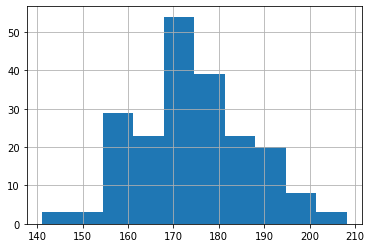

In [307]:
#To check the difference between normal length column and normalised length column 

data['length'].hist()

it is between 140 - 210 

<AxesSubplot:>

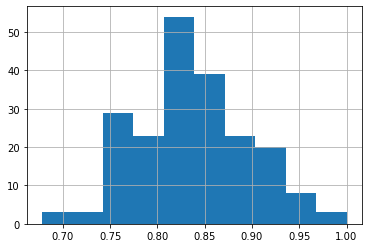

In [310]:
data['norm_length'].hist()

This data is between the range 0 - 1

##### Data shape is same but only scale has changed 

<AxesSubplot:>

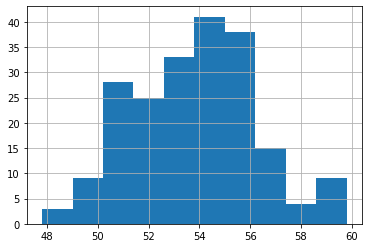

In [311]:
data['height'].hist()

<AxesSubplot:>

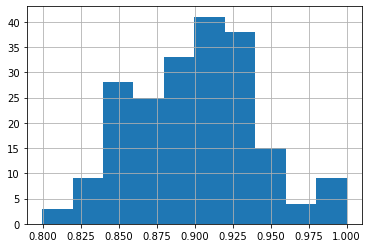

In [313]:
data['norm_height'] = data['height']/data['height'].max()
data['norm_height'].hist()

<AxesSubplot:>

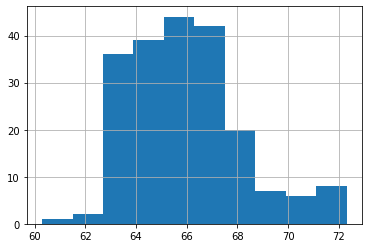

In [314]:
data['width'].hist()


<AxesSubplot:>

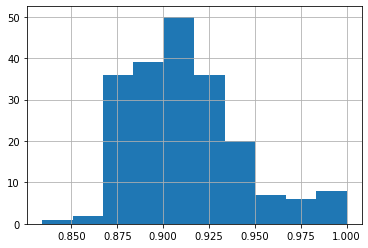

In [315]:
data['norm_width'] = data['width']/data['width'].max()
data['norm_width'].hist()

### ALways have to denormalise the proceess after the work done so know the process and its better to store the values for future use like max = 208

# Dummy Variables - Encoding data

In [321]:
#Taking a catagorical data column like num_of_doors

data['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

As here we have four and two categorical variables. both are strings and we can not use them as string in machine learning models
so we want to represent this data in a way or form that can be used in a machine learning algorithm by converting them to nomerical forms in a sensible menor 

like if we convert 

four 1
two  0

it will cause bais in our data so it is not a good practise. 
So use ....

In [324]:
#Use pandas get_dummies method to get dummy variables for the data
dummy_var = pd.get_dummies(data['num-of-doors'], prefix = 'doors')
dummy_var

,doors_four,doors_two
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
200,1,0
201,1,0
202,1,0
203,1,0


t is basically binary language for two and four.where for 
 - two  = 01
 - four = 10

and it is the same way as in row one 

 four two
  0    1        # two door yes and four door 0
  0    1
  1    0        # fourdoor 1 and two door 0

In [329]:
#Concating that column tothe data dataframe
pd.concat([data, dummy_var], axis=1)   # axis = 1 means adding a colum

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,norm_length,norm_height,norm_width,doors_four,doors_two
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,13495,11.200714,8.711667,0.811148,0.816054,0.886584,0,1
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500,11.200714,8.711667,0.811148,0.816054,0.886584,0,1
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500,12.379737,9.046731,0.822681,0.876254,0.905947,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,24,30,13950,9.800625,7.840500,0.848630,0.908027,0.915629,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,18,22,17450,13.067500,10.691591,0.848630,0.908027,0.918396,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,23,28,16845,10.226739,8.400536,0.907256,0.928094,0.952974,1,0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,19,25,19045,12.379737,9.408600,0.907256,0.928094,0.951591,1,0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,18,23,21485,13.067500,10.226739,0.907256,0.928094,0.952974,1,0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,26,27,22470,9.046731,8.711667,0.907256,0.928094,0.952974,1,0


## Saving the cleaned and engineered data 

In [330]:
data.to_csv('engineered_data.csv')